In [ ]:
# Importing pandaslibrary for datamanipulation and analysis
import pandas as Pndas

# Imported numpylibrary for numericaloperations and handlingarrays
import numpy as nmpyLib

# Imported matplotliblibrary for plottinggraphs and visualizingdata
import matplotlib.pyplot as plotLIB

# Imported seabornlibrary for enhanced-datavisualization and statisticalplotting
import seaborn as sBorn

# Imported LabelEncoder from sklearn to encodecategoricalvariables into numericalformat
from sklearn.preprocessing import LabelEncoder

# Imported preprocessing module fromsklearn for variouspreprocessing tasks
from sklearn import preprocessing

# Imported PlotlyExpress for creatinginteractive visualizations
import plotly.express as POX

# Imported f_classif for performing ANOVAFtest for featureselection
from sklearn.feature_selection import f_classif

# Imported RandomOverSampler from imbalanced-learn to handleclass imbalance via oversampling
from imblearn.over_sampling import RandomOverSampler

# Imported ExtraTreesClassifier from sklearn for feature selection and classification tasks
from sklearn.ensemble import ExtraTreesClassifier

# Imported classification_report to display the precisionscore, recallscore, F1score, and support for eachclass
from sklearn.metrics import classification_report

# Imported timelibrary for trackingexecution time of code
import time

# Imported figure_factory from Plotly to createcomplex figures and visualizations
import plotly.figure_factory as ff

# Imported graph_objects from Plotly for creatingfigures and customizingvisualizations
import plotly.graph_objects as go

# Imported roc_curve and roc_auc_score to compute the ROC curve and AUC score
from sklearn.metrics import roc_curve, roc_auc_score

# Imported to_categorical from Keras to convert class labels into one-hot encoded vectors
from keras.utils import to_categorical

# Defining and trainingneuralnetworks by importing a sequentialmodel from TensorFlow/Keras
from tensorflow.keras.models import Sequential

# Using Keras to import neural network layers such as Conv1D, Dense, Flatten, and Dropout
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout

# Importing Keras' Adam optimiser to maximise neural network training
from tensorflow.keras.optimizers import Adam

# Bringing in StandardScaler to scale and normalise features to unit variance and zero mean
from sklearn.preprocessing import StandardScaler

# Using synthetic datacreation, ADASYN is imported from imbalancedlearn to handle imbalanceddatasets.
from imblearn.over_sampling import ADASYN

# Creating training and test sets from the dataset by importing train_test_split
from sklearn.model_selection import train_test_split

# Importing multiple metrics to assess classification performance, such as F1score, ROCAUC score, recall, accuracy, and precision
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Adding other metrics to assess model performance, such as the confusion matrix, ROC curve, and precision-recall curve
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report, confusion_matrix

import warnings  # To handle warning messages while code is running, import the warnings library.
warnings.filterwarnings('ignore')  # Turning off warning messages to prevent output from becoming cluttered during runtime

### ***Load Dataset***

In [ ]:
# Loading the dataset CM1Dataset
CM1Dataset = Pndas.read_csv('/content/drive/MyDrive/S_N_Project/CM1 - dataset.csv')

In [ ]:
# checking the top five rows of CM1Dataset
CM1Dataset.head()

,1.1,1.4,1.4.1,1.4.2,1.3,1.3.1,1.3.2,1.3.3,1.3.4,1.3.5,...,2,2.1,2.2,2.3,1.2,1.2.1,1.2.2,1.2.3,1.4.3,FALSE
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,24,5,1,3,63,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15,15,44,19,9,False
2,20,4,4,2,47,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16,8,31,16,7,False
3,24,6,6,2,72,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16,12,46,26,11,False
4,24,6,6,2,72,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16,12,46,26,11,False


### ***Data Preprocessing***

In [ ]:
# Establishing a list of the dataset's column names
column_names = [
    "loc", "v(g)", "ev(g)", "iv(g)", "n", "v", "l", "d", "i", "e", "b", "t",
    "lOCode", "lOComment", "lOBlank", "locCodeAndComment",
    "uniq_Op", "uniq_Opnd", "total_Op", "total_Opnd", "branchCount", "defects"
]

# Giving the dataset 'CM1Dataset' the designated column names
CM1Dataset.columns = column_names

In [ ]:
# checking the shape of the dataset
CM1Dataset.shape

(497, 22)

In [ ]:
# geting the top five rows of the dataset
CM1Dataset.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1,1,1,1,1,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
1,24,5,1,3,63,309.13,0.11,9.50,32.54,2936.77,...,1,0,6,0,15,15,44,19,9,False
2,20,4,4,2,47,215.49,0.06,16.00,13.47,3447.89,...,0,0,3,0,16,8,31,16,7,False
3,24,6,6,2,72,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16,12,46,26,11,False
4,24,6,6,2,72,346.13,0.06,17.33,19.97,5999.58,...,0,0,3,0,16,12,46,26,11,False


In [ ]:
# geting the last five rows of the dataset
CM1Dataset.tail()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
492,47,3,1,3,256,1563.78,0.04,28.00,55.85,43785.90,...,2,13,2,0,23,46,144,112,5,True
493,24,4,3,3,107,587.63,0.05,19.13,30.72,11241.58,...,1,7,4,0,22,23,67,40,7,True
494,82,11,3,10,475,3155.83,0.02,44.71,70.59,141084.24,...,9,59,35,0,32,68,285,190,21,True
495,10,2,1,1,32,150.41,0.15,6.50,23.14,977.69,...,1,12,4,0,13,13,19,13,3,True
496,28,6,5,5,104,564.33,0.06,16.09,35.08,9078.38,...,2,7,0,0,20,23,67,37,11,True


In [ ]:
# checking info of the CM1Dataset
CM1Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                497 non-null    int64  
 1   v(g)               497 non-null    int64  
 2   ev(g)              497 non-null    int64  
 3   iv(g)              497 non-null    int64  
 4   n                  497 non-null    int64  
 5   v                  497 non-null    float64
 6   l                  497 non-null    float64
 7   d                  497 non-null    float64
 8   i                  497 non-null    float64
 9   e                  497 non-null    float64
 10  b                  497 non-null    float64
 11  t                  497 non-null    float64
 12  lOCode             497 non-null    int64  
 13  lOComment          497 non-null    int64  
 14  lOBlank            497 non-null    int64  
 15  locCodeAndComment  497 non-null    int64  
 16  uniq_Op            497 non

In [ ]:
# checking null values_sum
CM1Dataset.isnull().sum()

,0
loc,0
v(g),0
ev(g),0
iv(g),0
n,0
v,0
l,0
d,0
i,0
e,0


In [ ]:
# describing the dataset CM1Dataset
CM1Dataset.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,4.970000e+02,...,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,29.702213,5.390342,2.492958,3.533199,144.243461,901.984427,0.144004,15.858612,38.530121,3.495512e+04,...,1941.953018,3.790744,12.303823,11.553320,0.002012,15.227364,25.501006,88.565392,55.680080,9.364185
std,42.777414,8.353852,3.662205,5.469067,221.179689,1692.035656,0.150833,15.332506,36.995900,1.342907e+05,...,7460.593601,8.516852,25.850498,19.997018,0.044856,9.606922,33.942499,134.996581,87.022848,15.083175
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,8.000000,1.000000,1.000000,1.000000,25.000000,102.190000,0.050000,5.630000,16.210000,6.094700e+02,...,33.860000,0.000000,0.000000,1.000000,0.000000,9.000000,7.000000,15.000000,10.000000,1.000000
50%,17.000000,3.000000,1.000000,2.000000,68.000000,330.880000,0.090000,11.650000,27.400000,3.685040e+03,...,204.720000,1.000000,4.000000,5.000000,0.000000,14.000000,15.000000,42.000000,26.000000,5.000000
75%,31.000000,6.000000,1.000000,4.000000,152.000000,863.230000,0.170000,21.190000,46.900000,1.664911e+04,...,924.950000,4.000000,14.000000,13.000000,0.000000,20.000000,30.000000,95.000000,60.000000,11.000000
max,423.000000,96.000000,30.000000,63.000000,2075.000000,17124.280000,1.000000,125.770000,293.680000,2.153691e+06,...,119649.480000,80.000000,339.000000,164.000000,1.000000,72.000000,314.000000,1261.000000,814.000000,162.000000


### ***Data Visualization***

In [ ]:
# Using Plotly Express, create a scatter plot to show "loc" vs. "v(g)" with colour representing "defects."
fig = POX.scatter(CM1Dataset,  # Using the CM1Dataset for the plot
                  x='loc',  # Setting 'loc' as the x-axis variable
                  y='v(g)',  # Setting 'v(g)' as the y-axis variable
                  color='defects',  # Coloring the points based on the 'defects' column
                  title='Scatter Plot of loc vs v(g) by Defects')  # Defining the plot title

# Updating the layout of the plot to add axis titles and adjust size
fig.update_layout(xaxis_title='loc',  # Labeling the x-axis as 'loc'
                  yaxis_title='v(g)',  # Labeling the y-axis as 'v(g)'
                  width=1000,  # Setting the width of the plot to 1000 pixels
                  height=600)  # Setting the height of the plot to 600 pixels

# Putting the scatter plot on display
fig.show()

In [ ]:
# Creating a scatter plot using Plotly Express to visualize 'ev(g)' vs 'iv(g)' with color indicating 'defects'
fig = POX.scatter(CM1Dataset,  # Using the CM1Dataset for the plot
                  x='ev(g)',  # Setting 'ev(g)' as the x-axis variable
                  y='iv(g)',  # Setting 'iv(g)' as the y-axis variable
                  color='defects',  # Coloring the points based on the 'defects' column
                  title='Scatter Plot of ev(g) vs iv(g) by Defects')  # Defining the plot title

# Updating the layout of the plot to add axis titles and adjust size
fig.update_layout(xaxis_title='ev(g)',  # Labeling the x-axis as 'ev(g)'
                  yaxis_title='iv(g)',  # Labeling the y-axis as 'iv(g)'
                  width=1000,  # Setting the width of the plot to 1000 pixels
                  height=600)  # Setting the height of the plot to 600 pixels

# Displaying the scatter plot
fig.show()

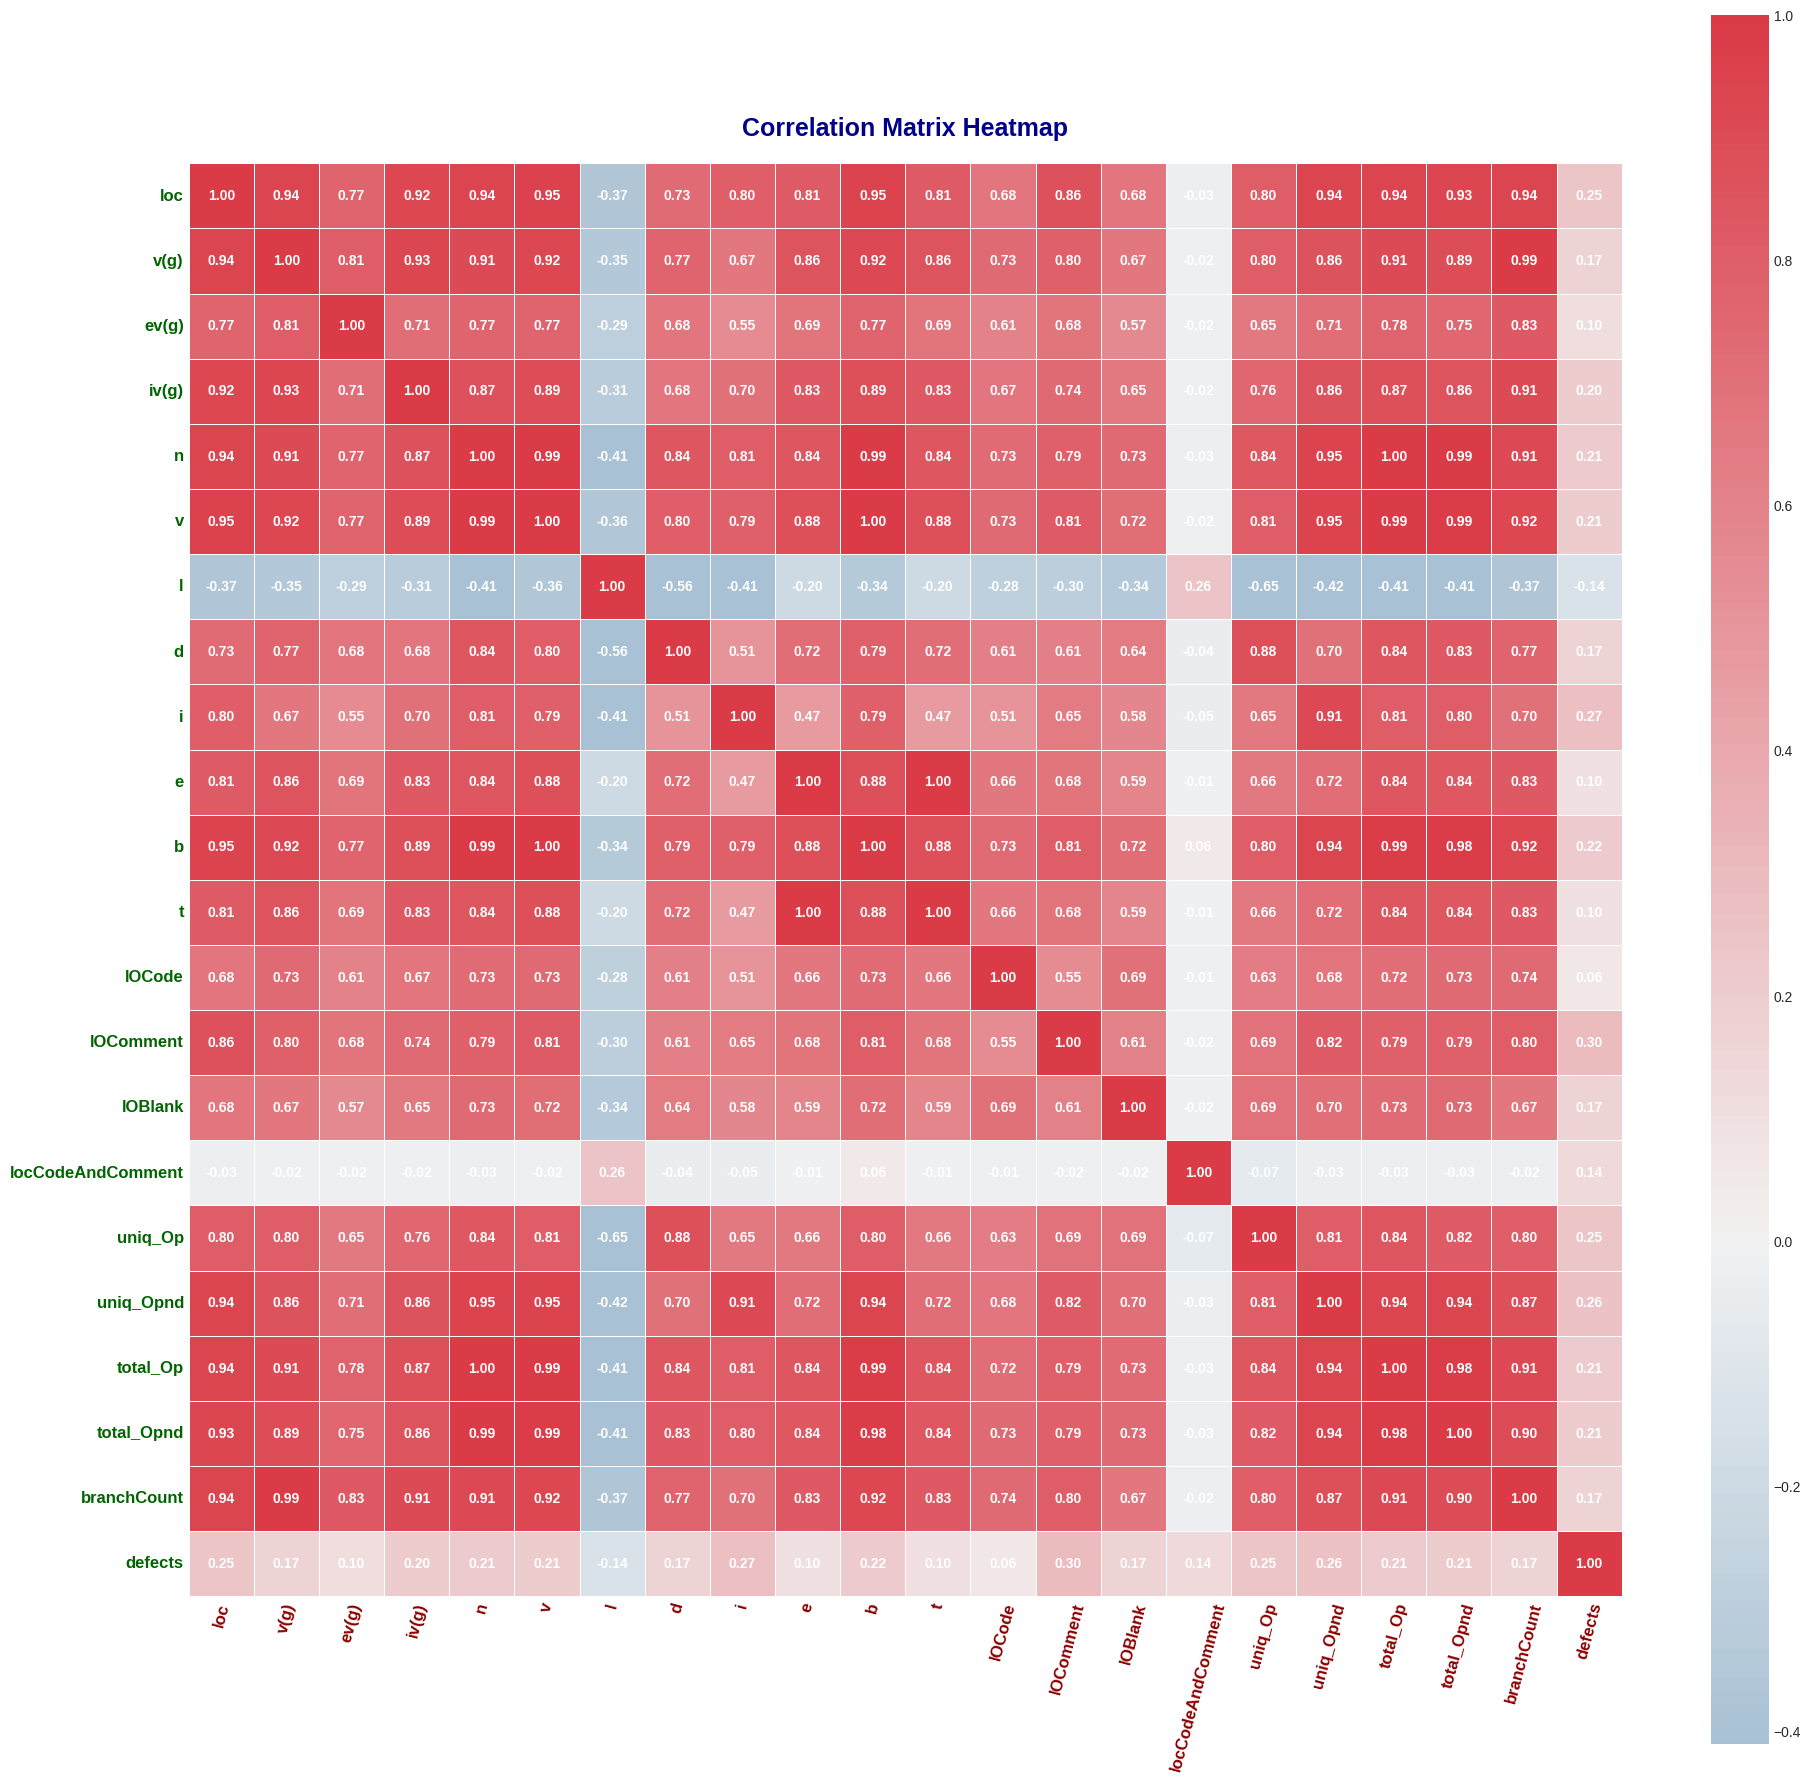

In [ ]:
corr_matrix = CM1Dataset.corr()

plotLIB.style.use('seaborn-darkgrid')

# Define the color palette and update colormap
custom_cmap = sBorn.diverging_palette(240, 10, n=256, as_cmap=True)  # Diverging palette for better balance

# Create a figure with modified dimensions
plotLIB.figure(figsize=(20, 25))

# Plot the heatmap with new color and style options
sBorn.heatmap(corr_matrix,
            annot=True,
            cmap=custom_cmap,  # Use the custom diverging palette
            fmt=".2f",
            annot_kws={"size": 10, "weight": "bold", "color": "white"},  # Customize annotation text
            linewidths=0.6,
            square=True,  # Keep cells square
            cbar_kws={"shrink": 0.7, "aspect": 30},  # Adjust color bar
            center=0,  # Set colormap center
            robust=True)  # Enhance colors for extreme values

# Modify title and axis font properties
plotLIB.title('Correlation Matrix Heatmap', fontsize=18, fontweight='bold', color='darkblue', pad=20)
plotLIB.xticks(fontsize=12, rotation=75, weight='bold', color='darkred')  # Rotate and color x-axis labels
plotLIB.yticks(fontsize=12, weight='bold', color='darkgreen')  # Style y-axis labels

# Ensure the layout is optimized
plotLIB.tight_layout()

# Show the plot
plotLIB.show()

In [ ]:
# Assuming CM1Dataset is your DataFrame and 'defects' is the target column
defects_counts = CM1Dataset['defects'].value_counts()

# Create a pie chart using Plotly
fig = POX.pie(defects_counts,
             values=defects_counts.values,
             names=defects_counts.index,
             title='Distribution of Defects')

# Show the plot
fig.show()

### ***Checking outliers***

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'loc'),
  Text(1, 0, 'v(g)'),
  Text(2, 0, 'ev(g)'),
  Text(3, 0, 'iv(g)'),
  Text(4, 0, 'n'),
  Text(5, 0, 'v'),
  Text(6, 0, 'l'),
  Text(7, 0, 'd'),
  Text(8, 0, 'i'),
  Text(9, 0, 'e'),
  Text(10, 0, 'b'),
  Text(11, 0, 't'),
  Text(12, 0, 'lOCode'),
  Text(13, 0, 'lOComment'),
  Text(14, 0, 'lOBlank'),
  Text(15, 0, 'locCodeAndComment'),
  Text(16, 0, 'uniq_Op'),
  Text(17, 0, 'uniq_Opnd'),
  Text(18, 0, 'total_Op'),
  Text(19, 0, 'total_Opnd'),
  Text(20, 0, 'branchCount'),
  Text(21, 0, 'defects')])

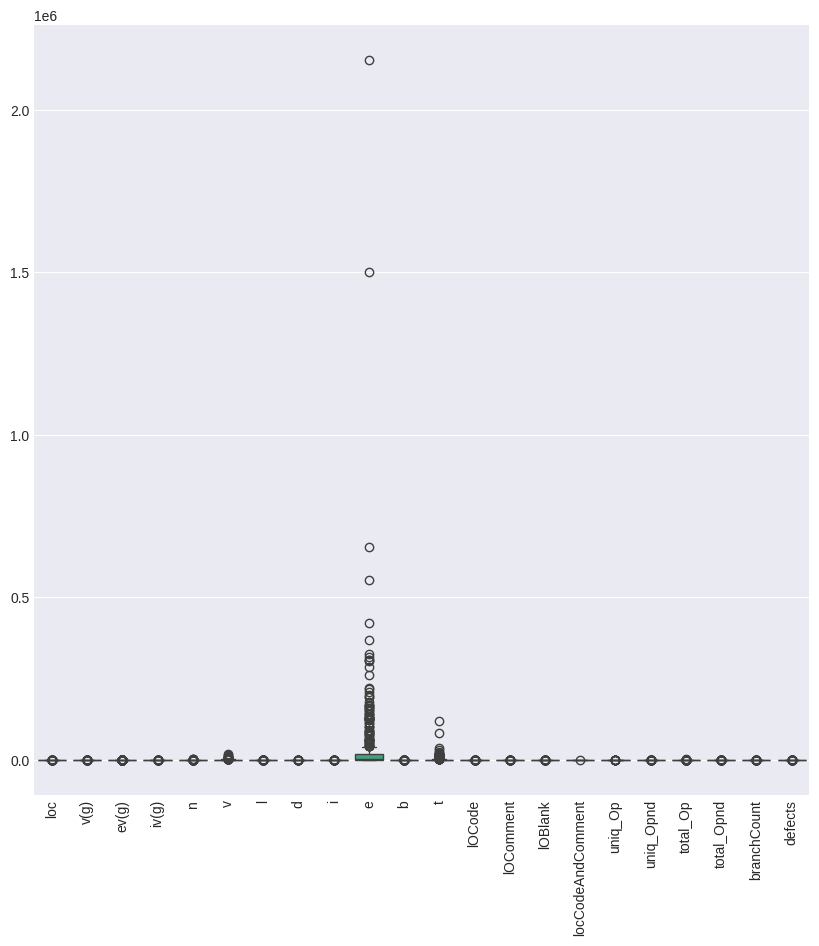

In [ ]:
# Setting the figure size for the boxplot using matplotlib
plotLIB.figure(figsize=(10, 10))

# Creating a boxplot using seaborn for visualizing the distribution of variables in CM1Dataset
sBorn.boxplot(CM1Dataset)

# Rotating the x-axis labels by 90 degrees to make them more readable
plotLIB.xticks(rotation=90)

### ***Removing Outliers***

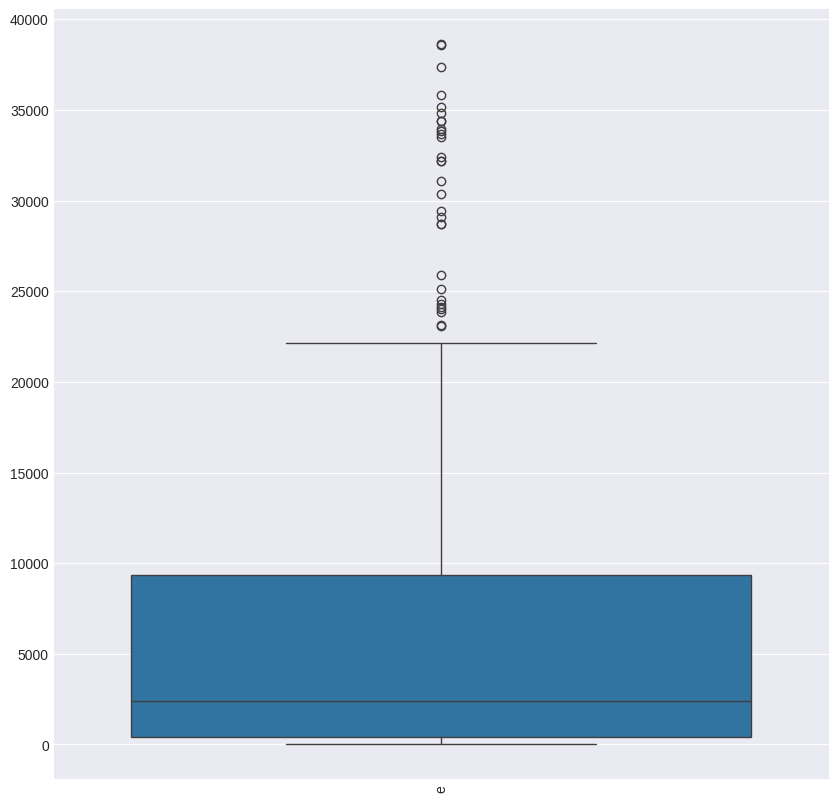

In [ ]:
# Function to remove outliers from a specific column using the IQR method
def remove_outliers_iqr(CM1Dataset, column):
    # Calculating the first quartile (Q1) and third quartile (Q3)
    Q1 = CM1Dataset[column].quantile(0.25)
    Q3 = CM1Dataset[column].quantile(0.75)

    # Calculating the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Determining the lower and upper bounds for outlier removal
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering the dataset to remove values outside the bounds
    CM1Dataset_filtered = CM1Dataset[(CM1Dataset[column] >= lower_bound) & (CM1Dataset[column] <= upper_bound)]

    # Returning the filtered dataset
    return CM1Dataset_filtered

# Removing outliers from the 'e' column using the remove_outliers_iqr function
for column in ['e']:
    CM1Dataset = remove_outliers_iqr(CM1Dataset, column)

# Setting the figure size for the boxplot visualization
plotLIB.figure(figsize=(10, 10))

# Creating a boxplot of the 'e' column after outlier removal
sBorn.boxplot(data=CM1Dataset[['e']])

# Rotating the x-axis labels by 90 degrees for better readability
plotLIB.xticks(rotation=90)

# Displaying the boxplot
plotLIB.show()

In [ ]:
CM1Dataset.dtypes

,0
loc,int64
v(g),int64
ev(g),int64
iv(g),int64
n,int64
v,float64
l,float64
d,float64
i,float64
e,float64


### ***Label Encoder***

In [ ]:
# Word_labels can be understood by the label_encoder object.
label_encoder = preprocessing.LabelEncoder()

# Encode the labels in the'species' column.
CM1Dataset['defects'] = label_encoder.fit_transform(CM1Dataset['defects'])

In [ ]:
# Verifying the datatype following label encoding
CM1Dataset.dtypes

,0
loc,int64
v(g),int64
ev(g),int64
iv(g),int64
n,int64
v,float64
l,float64
d,float64
i,float64
e,float64


### ***Split X,y***

In [ ]:
# Of interest variable.
X=CM1Dataset.drop('defects',axis=1)
y=CM1Dataset['defects']

In [ ]:
# checking the shape of the variable X
X.shape

(422, 21)

In [ ]:
# checking the shape of the variable y
y.shape

(422,)

### ***Data Normalization: Standerd Scaler***

In [ ]:
# Initializing a StandardScaler to standardize the features
scaler = StandardScaler()

# Applying the scaler to normalize the feature set X
X_normalized = scaler.fit_transform(X)

# Converting the normalized data back into a DataFrame for better readability and further analysis
X_normalized_df = Pndas.DataFrame(X_normalized, columns=X.columns)

### ***Feature Selection: ANOVA***

In [ ]:
# Use the ANOVA F-value to choose features.
f_statistic, p_values = f_classif(X_normalized_df, y)

# Construct a DataFrame to hold the outcomes.
feature_scores = Pndas.DataFrame({'Feature': X_normalized_df.columns, 'F-statistic': f_statistic, 'p-value': p_values})

# Sort features in descending order using the F-statistic
feature_scores = feature_scores.sort_values('F-statistic', ascending=False)

# Prior to choosing a feature
fig_before = POX.bar(feature_scores, x='Feature', y='F-statistic', title='Feature Importance Before Selection')
fig_before.show()


# Use the F-statistic to choose the top k features.
k = 10  # Decide how many of the best characteristics to choose.
selected_features = feature_scores['Feature'][:k].tolist()

# Make a fresh DataFrame with just a few chosen features.
X_selected = X_normalized_df[selected_features]

# Use the ANOVA F-value to choose features for the chosen data.
f_statistic_selected, p_values_selected = f_classif(X_selected, y)

# Construct a DataFrame to hold the outcomes for the chosen data.
feature_scores_selected = Pndas.DataFrame({'Feature': X_selected.columns, 'F-statistic': f_statistic_selected, 'p-value': p_values_selected})

# Features are sorted in descending order by F-statistic.
feature_scores_selected = feature_scores_selected.sort_values('F-statistic', ascending=False)

# Following the choosing of features
fig_after = POX.bar(feature_scores_selected, x='Feature', y='F-statistic', title='Feature Importance After Selection')
fig_after.show()